
# Régression linéaire **univariable** — workflow complet

Ce notebook montre, étape par étape :
1. Génération (ou chargement) d'un jeu de données **(X, y)** univariable  
2. **Visualisation** des points pour vérifier la linéarité  
3. **Régression linéaire** avec `scikit-learn`  
4. Récupération de l'**intercept** et de la **slope (pente)**  
5. **Courbe ajustée** superposée aux points  
6. Calcul des **erreurs** (résidus) et des **métriques** (MAE, MSE, RMSE, R²)  
7. **Visualisations des résidus** (résidus vs X, histogramme)

> Remarque : toutes les visualisations utilisent **matplotlib** (pas seaborn), un **seul graphique par figure**, et **couleurs par défaut**.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) Générer des données linéaires avec bruit
rng = np.random.default_rng(123)
n = 120
X = np.linspace(-3, 3, n).reshape(-1, 1)           # univariable => shape (n, 1)
true_intercept = 2.0
true_slope = 3.5
noise = rng.normal(0.0, 1.0, size=n)
y = true_intercept + true_slope * X[:, 0] + noise

print(f"True intercept: {true_intercept}, True slope: {true_slope}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


True intercept: 2.0, True slope: 3.5
X shape: (120, 1), y shape: (120,)


## 1) Visualiser les points pour juger la linéarité

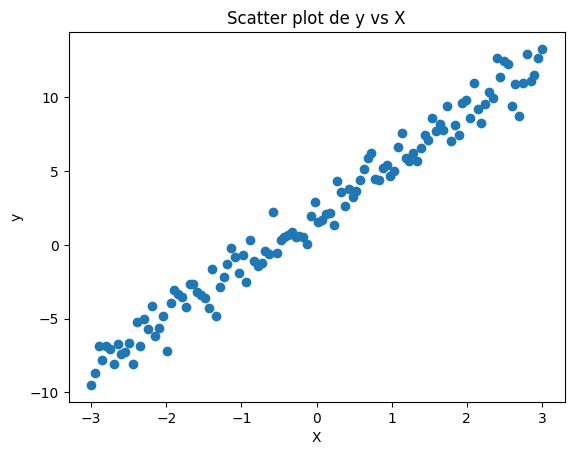

In [2]:

plt.figure()
plt.scatter(X[:, 0], y)
plt.title("Scatter plot de y vs X")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


## 2) Régression linéaire avec scikit-learn

In [3]:

model = LinearRegression(fit_intercept=True)
model.fit(X, y)
intercept_hat = model.intercept_
slope_hat = float(model.coef_[0])
print(f"Intercept estimé: {intercept_hat:.4f}")
print(f"Slope (pente) estimée: {slope_hat:.4f}")


Intercept estimé: 2.0754
Slope (pente) estimée: 3.4813


## 3) Superposer la droite ajustée

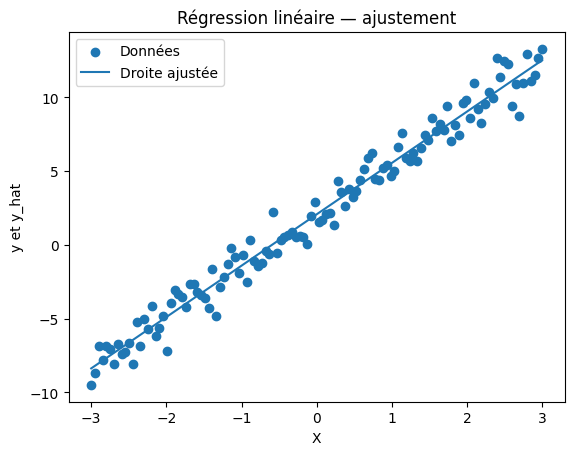

In [4]:

y_hat = model.predict(X)

plt.figure()
plt.scatter(X[:, 0], y, label="Données")
# Pour tracer la droite proprement, utilisons un X trié
order = np.argsort(X[:, 0])
X_ordered = X[order, 0]
yhat_ordered = y_hat[order]

plt.plot(X_ordered, yhat_ordered, label="Droite ajustée")
plt.title("Régression linéaire — ajustement")
plt.xlabel("X")
plt.ylabel("y et y_hat")
plt.legend()
plt.show()


## 4) Résidus et métriques d'erreur

In [5]:

residuals = y - y_hat
mae = mean_absolute_error(y, y_hat)
mse = mean_squared_error(y, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_hat)

print(f"MAE :  {mae:.4f}")
print(f"MSE :  {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²  :  {r2:.4f}")


MAE :  0.7721
MSE :  0.9163
RMSE : 0.9573
R²  :  0.9758


## 5) Graphiques des résidus

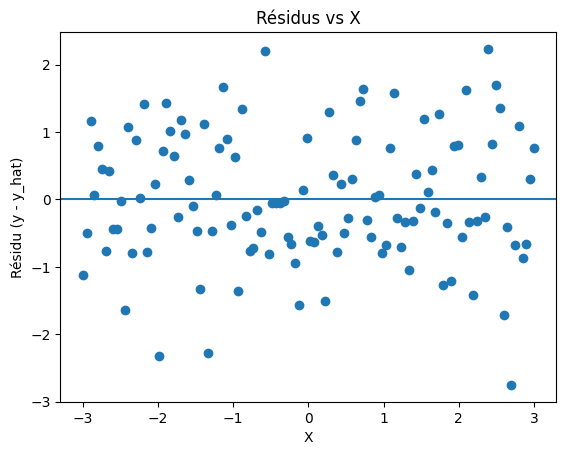

In [6]:

plt.figure()
plt.scatter(X[:, 0], residuals)
plt.axhline(0)
plt.title("Résidus vs X")
plt.xlabel("X")
plt.ylabel("Résidu (y - y_hat)")
plt.show()


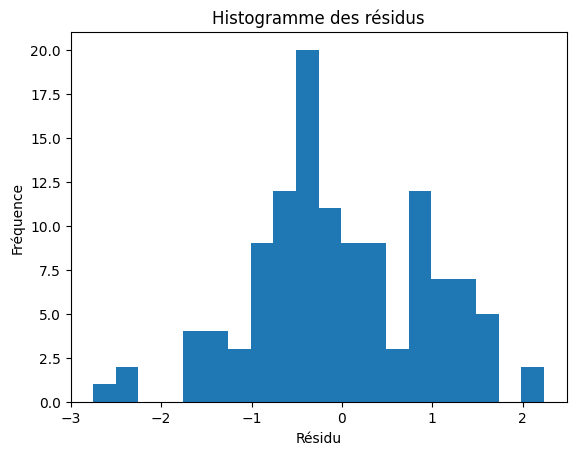

In [7]:

plt.figure()
plt.hist(residuals, bins=20)
plt.title("Histogramme des résidus")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.show()



### Notes d'interprétation

- Un **nuage de points** approximativement aligné indique qu'un modèle linéaire est plausible.
- La **droite ajustée** doit capturer la tendance générale.
- Les **résidus** doivent être centrés autour de 0, sans structure particulière (pas de forme en U, pas de corrélation apparente avec X).
- L'**histogramme des résidus** doit sembler (grossièrement) symétrique si l'hypothèse de bruit gaussien est raisonnable.
- Les **métriques** (MAE, RMSE, R²) servent à quantifier la qualité d'ajustement.


In [3]:
[
        '%d:%02d' % (h, m)         # formate l'heure en "H:MM"
        for h in range(12)         # h = 0 à 11
        for m in range(60)         # m = 0 à 59
        if (bin(h) + bin(m)).count('1') == 2
    ]

['0:03',
 '0:05',
 '0:06',
 '0:09',
 '0:10',
 '0:12',
 '0:17',
 '0:18',
 '0:20',
 '0:24',
 '0:33',
 '0:34',
 '0:36',
 '0:40',
 '0:48',
 '1:01',
 '1:02',
 '1:04',
 '1:08',
 '1:16',
 '1:32',
 '2:01',
 '2:02',
 '2:04',
 '2:08',
 '2:16',
 '2:32',
 '3:00',
 '4:01',
 '4:02',
 '4:04',
 '4:08',
 '4:16',
 '4:32',
 '5:00',
 '6:00',
 '8:01',
 '8:02',
 '8:04',
 '8:08',
 '8:16',
 '8:32',
 '9:00',
 '10:00']